In [94]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', 100)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [63]:
df=pd.read_csv('D://electro pi  scolership//task2//IBM//WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [64]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [66]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [67]:
df['Age'].nunique()

43

In [68]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

 Exploratory Data Analysis & cleaning 

In [70]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [71]:
df.shape

(1470, 35)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [73]:
df.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [74]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [75]:
df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0]
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


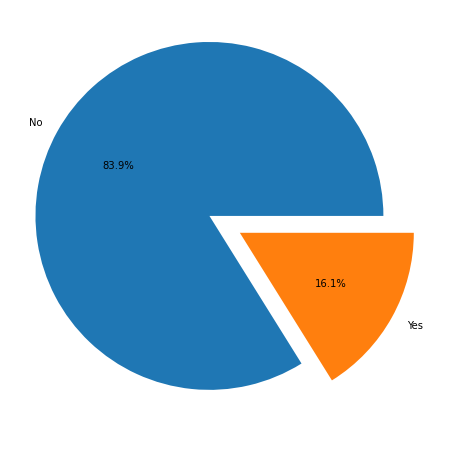

In [77]:
plt.figure(figsize=(8,8))
pie = df.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

In [78]:
df.select_dtypes(include=['int64']).dtypes

Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

<AxesSubplot:xlabel='Age', ylabel='Density'>

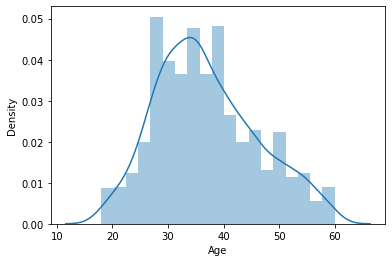

In [80]:
sns.distplot(df["Age"])

In [81]:
df[['Age']].value_counts().sort_values(ascending=False).head(10)

Age
35     78
34     77
36     69
31     69
29     68
32     61
30     60
38     58
33     58
40     57
dtype: int64

In [82]:
df[['Age']].value_counts().sort_values(ascending=False).tail()

Age
59     10
19      9
18      8
60      5
57      4
dtype: int64

<AxesSubplot:>

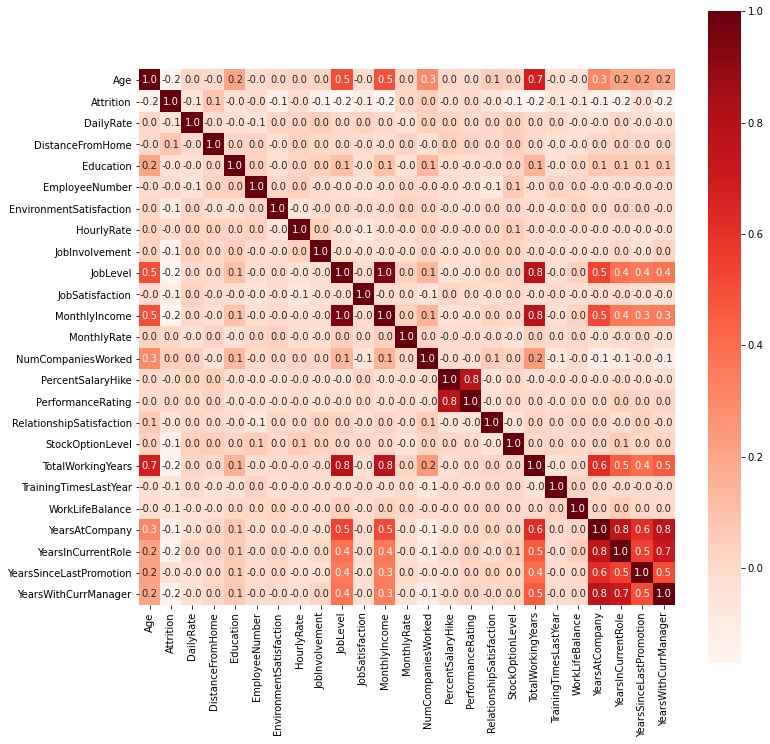

In [83]:
df = df.drop(['EmployeeCount','StandardHours'], axis=1) 
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

<AxesSubplot:xlabel='YearsAtCompany'>

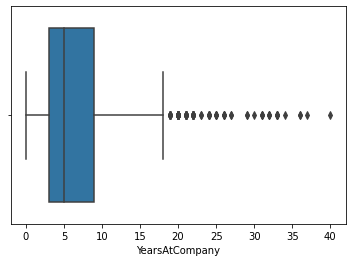

In [84]:
sns.boxplot(df["YearsAtCompany"])

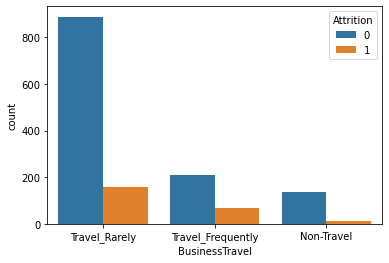

In [85]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df);

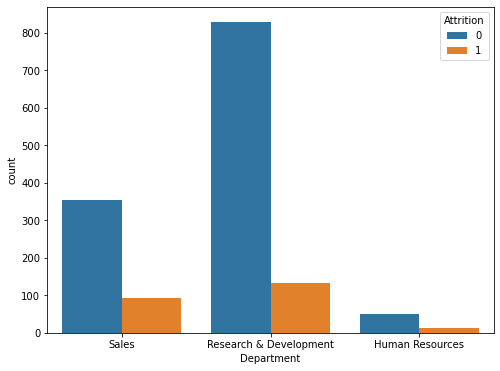

In [86]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=df);

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

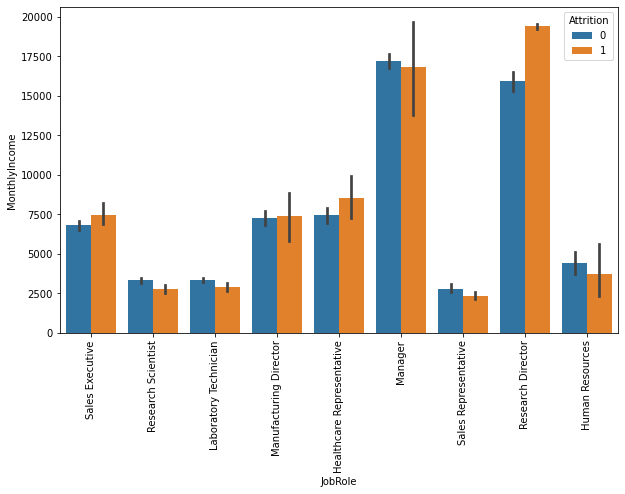

In [87]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df)
plt.xticks(rotation=90)

In [88]:
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,0,Travel_Rarely,468,Research & Development,28,4,Medical,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,8489,1,Y,No,14,3,2,0,5,3,1,5,4,0,4
1461,50,1,Travel_Rarely,410,Sales,28,3,Marketing,2055,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,Y,Yes,13,3,2,1,20,3,3,3,2,2,0
1462,39,0,Travel_Rarely,722,Sales,24,1,Marketing,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,8828,0,Y,No,11,3,1,1,21,2,2,20,9,9,6
1463,31,0,Non-Travel,325,Research & Development,5,3,Medical,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,0,10,2,3,9,4,1,7
1464,26,0,Travel_Rarely,1167,Sales,5,3,Other,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,21378,0,Y,No,18,3,4,0,5,2,3,4,2,0,0
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,0,17,3,2,9,6,0,8
1469,34,0,Travel_Rarely,628,Research & Development,8,3,Medical,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,0,6,3,4,4,3,1,2


In [91]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

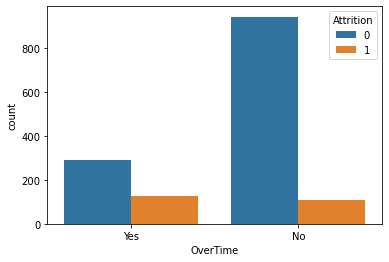

In [89]:
sns.countplot(x='OverTime', hue='Attrition', data=df);

splitting data

In [90]:
X = df.drop(['Attrition','BusinessTravel','EducationField','OverTime'],axis=1) # Features
y = df['Attrition'] # Target

In [95]:
X['Department'] = preprocessing.LabelEncoder().fit_transform(X['Department'])
X['Education'] = preprocessing.LabelEncoder().fit_transform(X['Education'])
X['JobRole'] = preprocessing.LabelEncoder().fit_transform(X['JobRole'])
X['Gender'] = preprocessing.LabelEncoder().fit_transform(X['Gender'])
X['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(X['MaritalStatus'])
X['Over18'] = preprocessing.LabelEncoder().fit_transform(X['Over18'])

In [97]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)
# Splitting Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 29)
(1176, 29)
(294, 29)


<AxesSubplot:>

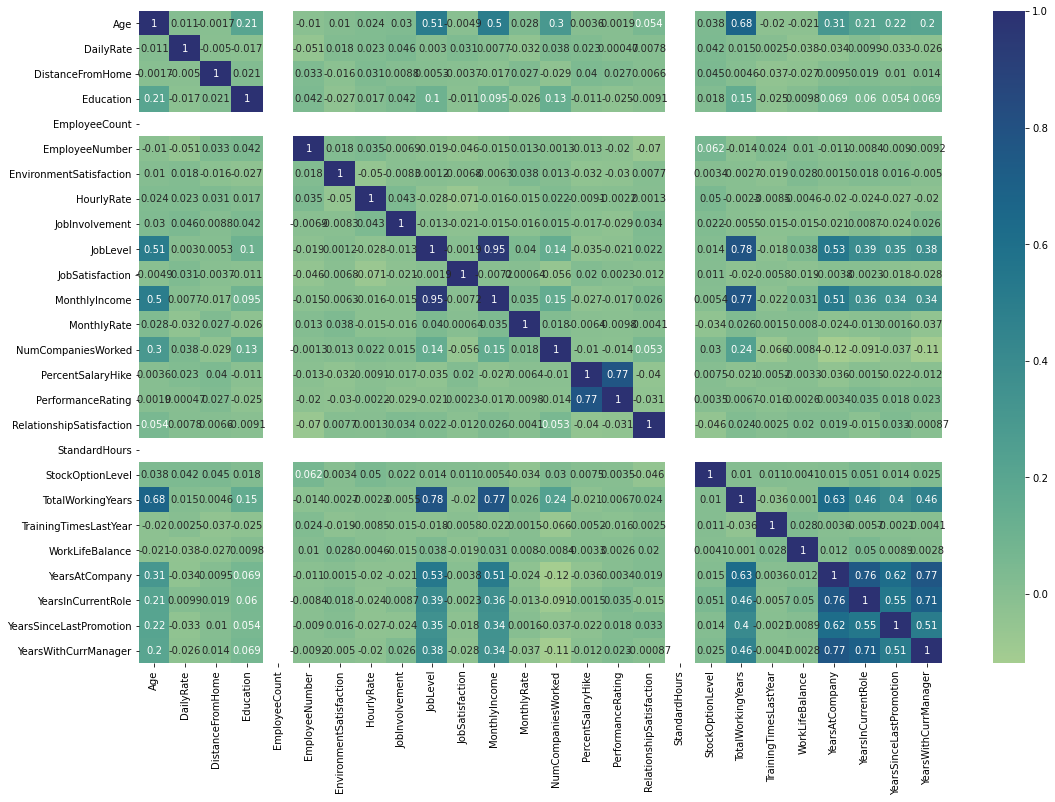

In [98]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr() , annot =True,cmap='crest')

In [99]:
X_train.shape

(1176, 29)

In [100]:
X_test.shape

(294, 29)

"comparison between all Regressors and Classifiers "

predict using logistic regression

In [101]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)

In [102]:
score = logistic_model.score(X_test, y_test)
print("Percentage Accuracy with logistic model is ",score*100)

Percentage Accuracy with logistic model is  85.71428571428571


In [103]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       246
           1       0.75      0.19      0.30        48

    accuracy                           0.86       294
   macro avg       0.81      0.59      0.61       294
weighted avg       0.84      0.86      0.82       294



<AxesSubplot:>

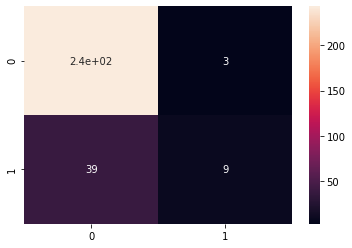

In [104]:
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True)

predict using Random Forest

In [105]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
score = rf_model.score(X_test, y_test)
print("Percentage Accuracy with RandomForest model is ",score*100)

Percentage Accuracy with RandomForest model is  83.33333333333334


In [106]:
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       246
           1       0.40      0.04      0.08        48

    accuracy                           0.83       294
   macro avg       0.62      0.51      0.49       294
weighted avg       0.77      0.83      0.77       294



<AxesSubplot:>

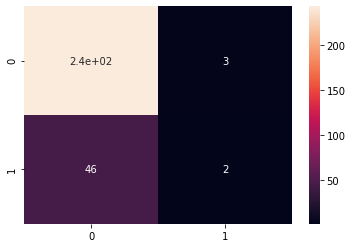

In [107]:
cf_matrix = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cf_matrix, annot=True)

Decision Tree Model

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
score = dt_model.score(X_test, y_test)
print("Percentage Accuracy with Decision Tree Model is ",score*100)

Percentage Accuracy with Decision Tree Model is  79.59183673469387


In [109]:
print("Classification Report:")
print(classification_report(y_test, dt_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       246
           1       0.37      0.35      0.36        48

    accuracy                           0.80       294
   macro avg       0.62      0.62      0.62       294
weighted avg       0.79      0.80      0.79       294



<AxesSubplot:>

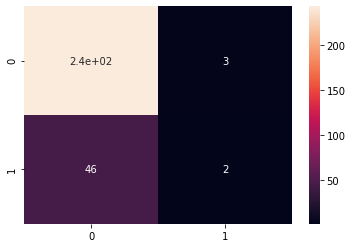

In [110]:
cf_matrix = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cf_matrix, annot=True)

SVM

In [111]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
score = svm_model.score(X_test, y_test)
print("Percentage Accuracy with Decision Tree Model is ",score*100)

Percentage Accuracy with Decision Tree Model is  83.6734693877551


In [112]:
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       246
           1       0.50      0.04      0.08        48

    accuracy                           0.84       294
   macro avg       0.67      0.52      0.49       294
weighted avg       0.79      0.84      0.77       294



<AxesSubplot:>

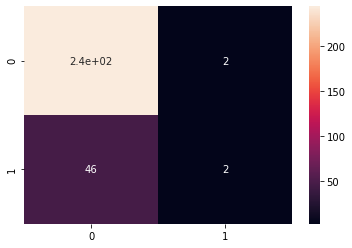

In [113]:
cf_matrix = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cf_matrix, annot=True)

KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = svm_model.predict(X_test)
score = knn_model.score(X_test, y_test)
print("Percentage Accuracy with KNN Model is ",score*100)

Percentage Accuracy with KNN Model is  83.33333333333334


In [115]:
print("Classification Report:")
print(classification_report(y_test, knn_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       246
           1       0.50      0.04      0.08        48

    accuracy                           0.84       294
   macro avg       0.67      0.52      0.49       294
weighted avg       0.79      0.84      0.77       294



<AxesSubplot:>

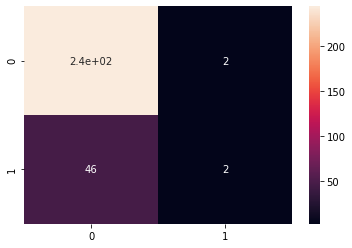

In [116]:
cf_matrix = confusion_matrix(y_test, knn_predictions)
sns.heatmap(cf_matrix, annot=True)

Adaboost Classifier

In [117]:
from sklearn.ensemble import AdaBoostClassifier
adab_model=AdaBoostClassifier()
adab_model.fit(X_train, y_train)
adab_predictions = adab_model.predict(X_test)
score = adab_model.score(X_test, y_test)
print("Percentage Accuracy with AdaBoost Model is ",score*100)


Percentage Accuracy with AdaBoost Model is  85.37414965986395


In [118]:
print("Classification Report:")
print(classification_report(y_test, adab_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       246
           1       0.67      0.21      0.32        48

    accuracy                           0.85       294
   macro avg       0.77      0.59      0.62       294
weighted avg       0.83      0.85      0.82       294



<AxesSubplot:>

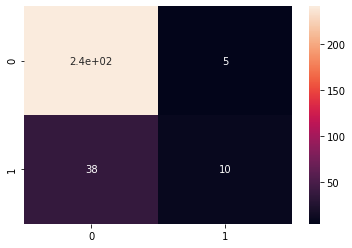

In [119]:
cf_matrix = confusion_matrix(y_test, adab_predictions)
sns.heatmap(cf_matrix, annot=True)

PCA

In [120]:
from sklearn.decomposition import PCA
pca_model=PCA()
pca_model.fit(X_train, y_train)
pca_predictions = adab_model.predict(X_test)
score = pca_model.score(X_test, y_test)
print("Percentage Accuracy with PCA Model is ",score*100)

Percentage Accuracy with PCA Model is  -608.5346612639227


In [121]:
print("Classification Report:")
print(classification_report(y_test, pca_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       246
           1       0.67      0.21      0.32        48

    accuracy                           0.85       294
   macro avg       0.77      0.59      0.62       294
weighted avg       0.83      0.85      0.82       294



<AxesSubplot:>

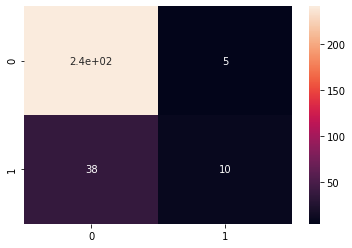

In [122]:
cf_matrix = confusion_matrix(y_test, pca_predictions)
sns.heatmap(cf_matrix, annot=True)

Naive Bayes

In [123]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train, y_train)
classifier_predictions = classifier.predict(X_test)
score = classifier.score(X_test, y_test)
print("Percentage Accuracy with Naive Bayes Model is ",score*100)


Percentage Accuracy with Naive Bayes Model is  79.93197278911565


In [124]:
print("Classification Report:")
print(classification_report(y_test, classifier_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       246
           1       0.41      0.52      0.46        48

    accuracy                           0.80       294
   macro avg       0.66      0.69      0.67       294
weighted avg       0.82      0.80      0.81       294



<AxesSubplot:>

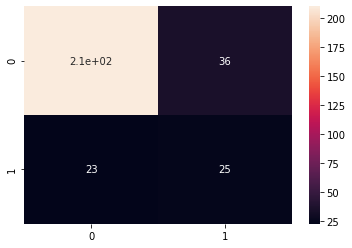

In [125]:
cf_matrix = confusion_matrix(y_test, classifier_predictions)
sns.heatmap(cf_matrix, annot=True)

In [126]:
from sklearn.linear_model import Perceptron
prcptrn=Perceptron()
prcptrn.fit(X_train, y_train)
prcptrn_predictions = prcptrn.predict(X_test)
score = prcptrn.score(X_test, y_test)
print("Percentage Accuracy with Perceptron Model is ",score*100)


Percentage Accuracy with Perceptron Model is  77.21088435374149


In [127]:
print("Classification Report:")
print(classification_report(y_test, prcptrn_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       246
           1       0.32      0.35      0.34        48

    accuracy                           0.77       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.78      0.77      0.78       294



<AxesSubplot:>

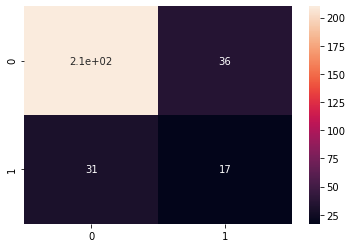

In [128]:
cf_matrix = confusion_matrix(y_test, prcptrn_predictions)
sns.heatmap(cf_matrix, annot=True)

XGBoosting

In [129]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_model_predictions = xgb_model.predict(X_test)
score = xgb_model.score(X_test, y_test)
print("Percentage Accuracy with XGBoosting Model is ",score*100)

[17:19:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Percentage Accuracy with XGBoosting Model is  83.33333333333334


In [130]:
print("Classification Report:")
print(classification_report(y_test, xgb_model_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       246
           1       0.48      0.21      0.29        48

    accuracy                           0.83       294
   macro avg       0.67      0.58      0.60       294
weighted avg       0.80      0.83      0.81       294



<AxesSubplot:>

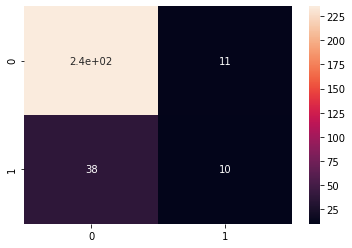

In [131]:
cf_matrix = confusion_matrix(y_test, xgb_model_predictions)
sns.heatmap(cf_matrix, annot=True)

comparison_results:

the highest performance is to logistic regression and then Adaboost 

the worest performance was  PCA